In [1]:
# import necesarry modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [2]:
# import the dataset
auto_mpg = pd.read_csv('./auto_mpg.csv')
auto_mpg.head()

mpg  displ   hp  weight  accel  origin  size
0  18.0  250.0   88    3139   14.5      US  15.0
1   9.0  304.0  193    4732   18.5      US  20.0
2  36.1   91.0   60    1800   16.4    Asia  10.0
3  18.5  250.0   98    3525   19.0      US  15.0
4  34.3   97.0   78    2188   15.8  Europe  10.0

In [3]:
# information of the dataset
auto_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     392 non-null    float64
 1   displ   392 non-null    float64
 2   hp      392 non-null    int64  
 3   weight  392 non-null    int64  
 4   accel   392 non-null    float64
 5   origin  392 non-null    object 
 6   size    392 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 21.6+ KB


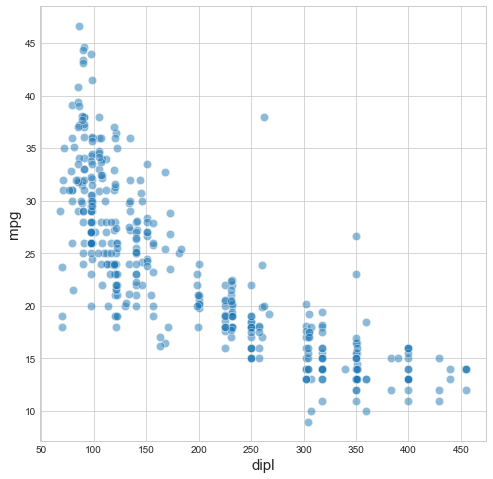

In [4]:
# plot auto_mpg cancer dataset in 2D
plt.figure(figsize = [8, 8])
sns.scatterplot(x = 'displ',
                y = 'mpg',
                data = auto_mpg,
                markers = '.',
                alpha = 0.5,
                s = 70)
plt.xlabel('dipl', size = 15)
plt.ylabel('mpg', size = 15)

plt.show()

In [5]:
# Create feature and target arrays
X = auto_mpg[['displ']]
y = auto_mpg[['mpg']]
data = [X, y]
data[0].head()

displ
0  250.0
1  304.0
2   91.0
3  250.0
4   97.0

In [6]:
# regression-tree in scikit-learn
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# splot dataset into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 3)

# instantiate a DecisionTreeRegressor 'dt'
dt = DecisionTreeRegressor(max_depth = 4,
                           min_samples_leaf = 0.26,
                           random_state = 3)

In [7]:
# fit dt to the training-set
dt.fit(X_train, y_train)

# predict test-set labels
y_pred = dt.predict(X_test)

# compute test-set MSE
mse_dt = MSE(y_test, y_pred)

# compute test-set RMSE
rmse_dt = mse_dt ** (1/2)

# print rmse_dt
print("Test set RMSE of dt: {:.3f}".format(rmse_dt))

Test set RMSE of dt: 5.006


In [8]:
# K-Fold CV in sklearn on the auto_mpg dataset
from sklearn.model_selection import cross_val_score

# evaluate the list of MSE ontained by 10-fold CV
# set n_jobs to -1 in order to exploit all CPU cores in computation
MSE_CV_scores = - cross_val_score(dt,
                           X_train,
                           y_train,
                           cv = 5,
                           scoring = 'neg_mean_squared_error',
                           n_jobs = -1)

# fit dt to the training set
dt.fit(X_train, y_train)

# predict the labels of training set
y_predict_train = dt.predict(X_train)

# predict the labels of the test set
y_predict_test = dt.predict(X_test)

In [9]:
# Compute the 5-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean()) ** (1/2)

# Print RMSE_CV
print('CV RMSE: {:.3f}'.format(RMSE_CV))


# Compute the 5-folds Train RMSE
RMSE_train = (MSE(y_train, y_predict_train)) ** (1/2)

# Print RMSE_train
print('Train RMSE: {:.3f}'.format(RMSE_train))

# Compute the 5-folds Test RMSE
RMSE_test = (MSE(y_test, y_predict_test)) ** (1/2)

# Print RMSE_test
print('Test RMSE: {:.3f}'.format(RMSE_test))

CV RMSE: 4.424
Train RMSE: 4.297
Test RMSE: 5.006


Random Forest

In [10]:
# get dummies
auto_mpg = pd.get_dummies(auto_mpg)
auto_mpg.head()

mpg  displ   hp  weight  accel  size  origin_Asia  origin_Europe  \
0  18.0  250.0   88    3139   14.5  15.0            0              0   
1   9.0  304.0  193    4732   18.5  20.0            0              0   
2  36.1   91.0   60    1800   16.4  10.0            1              0   
3  18.5  250.0   98    3525   19.0  15.0            0              0   
4  34.3   97.0   78    2188   15.8  10.0            0              1   

   origin_US  
0          1  
1          1  
2          0  
3          1  
4          0

In [11]:
# Create feature and target arrays
X = auto_mpg[['displ', 'hp', 'weight', 'accel', 'size', 'origin_Asia', 'origin_Europe', 'origin_US']]
y = auto_mpg[['mpg']]
data = [X, y]
data[0].head()

displ   hp  weight  accel  size  origin_Asia  origin_Europe  origin_US
0  250.0   88    3139   14.5  15.0            0              0          1
1  304.0  193    4732   18.5  20.0            0              0          1
2   91.0   60    1800   16.4  10.0            1              0          0
3  250.0   98    3525   19.0  15.0            0              0          1
4   97.0   78    2188   15.8  10.0            0              1          0

In [12]:
# basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# splot dataset into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 3)


In [13]:
# instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestRegressor(n_estimators = 400,
                           min_samples_leaf = 0.12,
                           random_state = 3)

# fit rf to the training set
rf.fit(X_train, y_train)

# predict the test set labels 'y_pred'
y_pred = rf.predict(X_test)

# evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred) ** (1/2)

# print the test set RMSE
print('Test set RMSE of rf: {:.3f}'.format(rmse_test))

Test set RMSE of rf: 4.499


Feature Importance

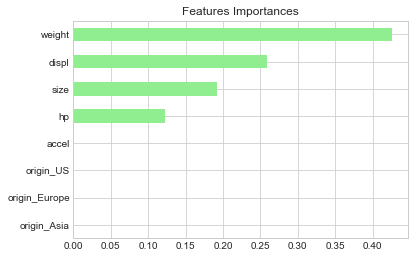

In [14]:
# create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = X.columns)

# sort importances_rf
sorted_importances_rf = importances_rf.sort_values()

# make a horizontal bar plot
sorted_importances_rf.plot(kind = 'barh', color = 'lightgreen')
plt.title('Features Importances')
plt.show()

Gradient Boosting

In [15]:
# import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# splot dataset into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 3)

In [16]:
# instantiate a GradientBoostingRegressor 'gdt'
gbt = GradientBoostingRegressor(n_estimators = 300,
                                max_depth = 1,
                                random_state = 3)

# fit gdt to the training set
gbt.fit(X_train, y_train)

# predict the test set labels
y_pred = gbt.predict(X_test)

# evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred) ** (1/2)

# print the test set RMSE
print('Test set RMSE: {:.3f}'.format(rmse_test))

Test set RMSE: 4.261


Stochastic Gradient Boosting

In [17]:
# import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# splot dataset into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 3)

In [19]:
# instantiate a stochastic GradientBoostingRegressor 'sgbt
sgbt = GradientBoostingRegressor(max_depth = 1,
                                 subsample = 0.8,
                                 max_features = 0.2,
                                 n_estimators = 300,
                                 random_state = 3)

# fit sgbt to the training set
sgbt.fit(X_train, y_train)

# predict the test set labels
y_pred = sgbt.predict(X_test)

# evaluate test set RMSE 'rmse_test'
rmse_test = MSE(y_test, y_pred) ** (1/2)

# print 'rmse_test'
print('Test set RMSE: {:.3f}'.format(rmse_test))

Test set RMSE: 4.335


Random Forests' Hyperparameters Tuning

In [21]:
# basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# splot dataset into 70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 3)

# instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state = 3)

In [22]:
# inspect 'rf' s hyperparameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3,
 'verbose': 0,
 'warm_start': False}

In [23]:
# import GridSearchCV
from sklearn.model_selection import GridSearchCV

# define a grid of hyperparameter 'params_rf'
params_rf = {
             'n_estimators' : [300, 400, 500],
             'max_depth' : [4, 6, 8],
             'min_samples_leaf' : [0.1, 0.2],
             'max_features' : ['log2', 'sqrt']
            }

# instantiate 'grid_rf'
grid_rf = GridSearchCV(estimator = rf,
                       param_grid = params_rf,
                       cv = 3,
                       scoring = 'neg_mean_squared_error',
                       verbose = 1,
                       n_jobs = -1)

In [24]:
# fit 'grid_rf' to the training set
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   26.0s finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=3), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [0.1, 0.2],
                         'n_estimators': [300, 400, 500]},
             scoring='neg_mean_squared_error', verbose=1)

In [25]:
# extract best hyperparameters from 'grid_rf'
best_hyperparams = grid_rf.best_params_

print('Best hyperparameters:\n', best_hyperparams)

Best hyperparameters:
 {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 500}


In [26]:
# extract best model from 'grid_rf'
best_model = grid_rf.best_estimator_

# predict the test set labels
y_pred = best_model.predict(X_test)

# evaluate the test set RMSE
rmse_test = MSE(y_test, y_pred) ** (1/2)

# print the test set RMSE
print('Test set RMSE of rf: {:.3f}'.format(rmse_test))

Test set RMSE of rf: 4.540
